<a href="https://colab.research.google.com/github/sandeepshabd/DeepLearning_Masters/blob/main/week2/Basic_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
%pylab inline
import torch
import sys
import csv
import os
import cv2
import matplotlib.pyplot as plt
import torch.optim as optim

from PIL import Image

from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import transforms
from torchvision.io import read_image


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [59]:
image_train_folder = '/content/data/train'
image_test_folder = '/content/data/test'
label_file = "labels.csv"
convert_tensor = transforms.ToTensor()

train_data = []
test_data = []

images_train = []
labels_train = []

images_test = []
images_labels = []

train_filePath = os.path.join(image_train_folder,'labels.csv')
test_filePath = os.path.join(image_test_folder,'labels.csv')
LABEL_NAMES = ['background', 'kart', 'pickup', 'nitro', 'bomb', 'projectile']


In [60]:
to_image = transforms.ToPILImage()

def load_image(image_path):
    image = Image.open(image_path)  # Use torchvision.io to read the image
    image = transforms.ToTensor()(image)
    image = transforms.Resize((32, 32))(image)  # Resize the image if needed
    image = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(image)  # Normalize the image
    return image

In [63]:
def load_labels_and_images(images_train,labels_train):

  image_paths =[]
  labels = []

  with open(train_filePath, 'r') as f:
              rows = csv.reader(f)
              for fname, label, _ in rows:
                  if label in LABEL_NAMES:
                      #image = Image.open(os.path.join(image_train_folder, fname))
                      image_paths.append(os.path.join(image_train_folder, fname))
                      label_id = LABEL_NAMES.index(label)
                      labels.append(label_id)
  images_train = torch.stack([load_image(image_path) for image_path in image_paths])
  labels_train = torch.tensor(labels)

  return images_train, labels_train




In [64]:
# Load and preprocess images
images_train,labels_train = load_labels_and_images(images_train,labels_train)

# Create a TensorDataset
dataset_train = TensorDataset(images_train, labels_train)

batch_size = 32  # Adjust the batch size as needed
data_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:


for filename in os.listdir(image_train_folder):
    img = cv2.imread(os.path.join(image_train_folder, filename))
    if img is not None:
        images_train.append(img)

In [ ]:
for filename in os.listdir(image_test_folder):
    img = cv2.imread(os.path.join(image_test_folder, filename))
    if img is not None:
        images_test.append(img)

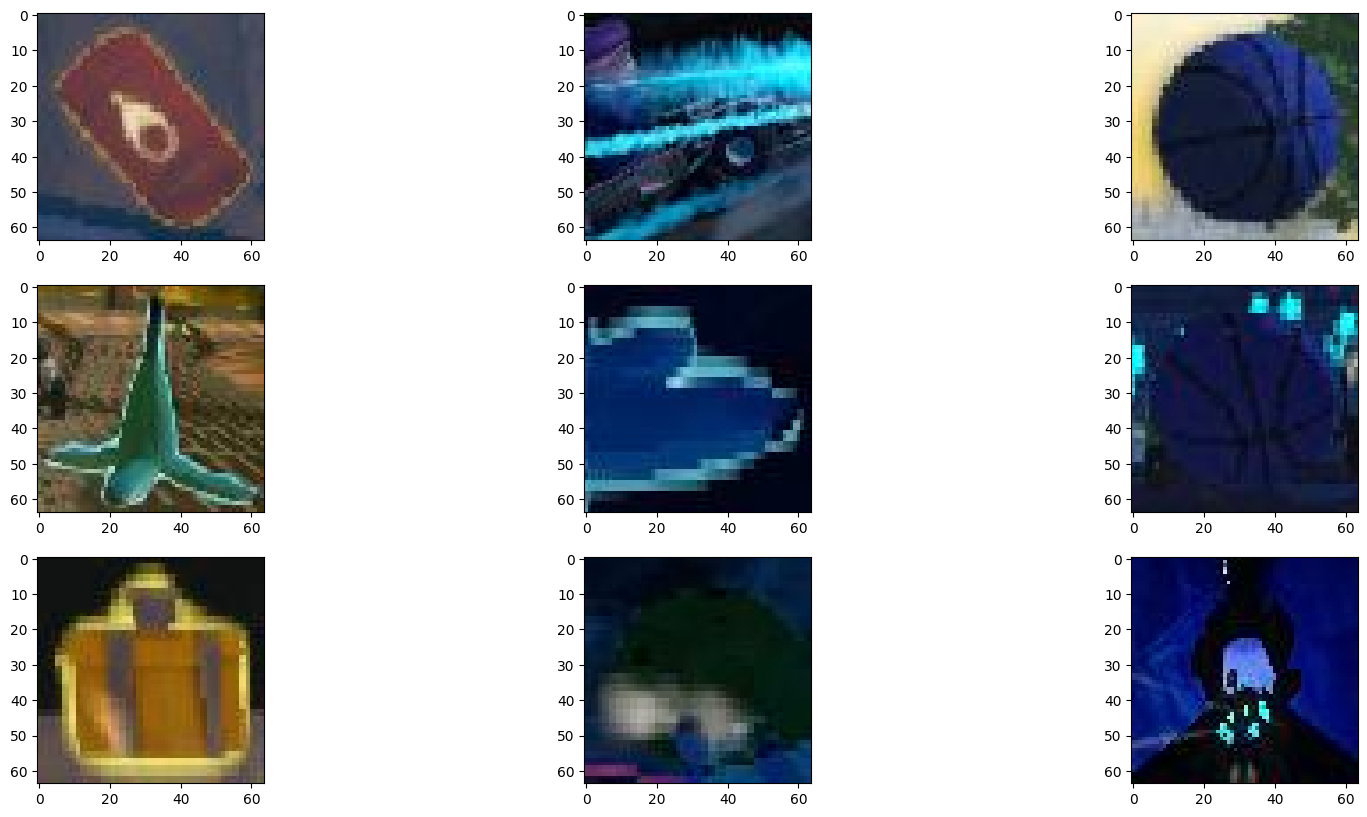

In [6]:


plt.figure(figsize=(20,10))

for i, image in enumerate(images_train[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)

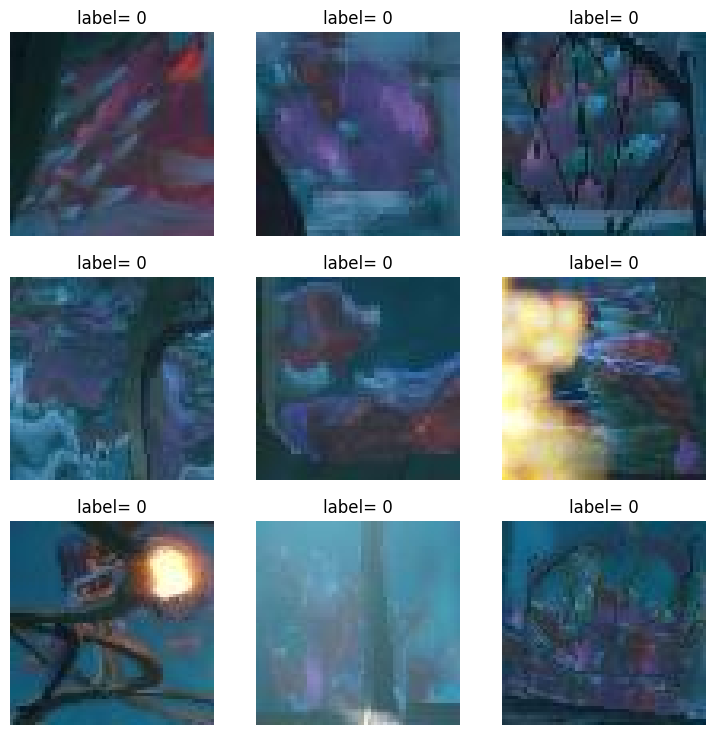

In [15]:

input_size = 32*32*3
output_size = 6


plt.figure(figsize=(9,9))
to_image = transforms.ToPILImage()
for i, (image,label) in enumerate(train_data[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(to_image(image))
    plt.title('label= %d'%label)
    axis('off')



# New Section

# New Section

In [48]:
class Network1(torch.nn.Module):
  def __init__(self, n_hidden = 100):
    super(Network1, self).__init__()
    self.linear = torch.nn.Linear(input_size, n_hidden)
    self.linear2 = torch.nn.Linear(n_hidden, 1)
    self.activation = torch.nn.ReLU()


  def forward(self, x):
    x = self.linear2(self.activation(self.linear(x.view(x.size(0),-1))))
    return x



In [67]:
net1 = Network1(100)
print(net1(images_train).view(-1).detach().numpy())



[-0.13654044  0.12464394  0.17922765 ... -0.1239575  -0.08927019
  0.18191917]


In [56]:
class NetworkDynamic(torch.nn.Module):
  def __init__(self, *n_hidden):
    super(NetworkDynamic, self).__init__()
    layer = []
    in_size = input_size
    for i in n_hidden:
      layer.append(torch.nn.Linear(in_size, i))
      in_size = i
      layer.append(torch.nn.ReLU())

    self.network = torch.nn.Sequential(*layer)
    self.classifier = torch.nn.Linear(in_size, 1)



  def forward(self, x):
    x = self.classifier(self.network(x.view(x.size(0),-1)))
    return x


In [58]:
net2 = NetworkDynamic(100, 50, 20)
print(net2(images_train).view(-1).detach().numpy())


[0.22623575 0.22900027 0.26513523 ... 0.21179098 0.24272965 0.26002985]


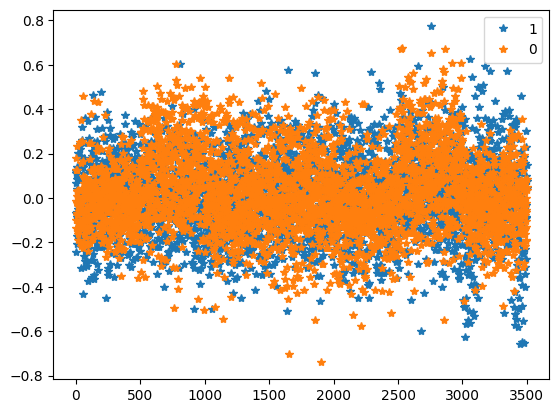

In [75]:
plot(net1((images_train[labels_train== 1])).view(-1).detach().numpy(),'*',label='1')
plot(net1((images_train[labels_train== 0])).view(-1).detach().numpy(),'*',label='0')
legend()

In [69]:
plot(net2(dataset[labels_train=='0']).view(-1).detach().numpy(),'*',label='0')


AttributeError: ignored